<a href="https://colab.research.google.com/github/Godwin6704/HIV-patients-/blob/main/HIV_patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1 **Importing** **if** **the** **required** **libraries**

###**Libraries and their Purpose:**

##### 1.  **`pandas` (`pd`)**: Used for data manipulation and analysis. It provides data structures like DataFrames for efficient handling of tabular data.

##### 2.  **`numpy` (`np`)**: Provides support for numerical computations and array operations. It is often used in conjunction with pandas for data manipulation.

##### 3.  **`matplotlib.pyplot` (`plt`)**:  A widely used library for creating static, interactive, and animated visualizations in Python.

##### 4.  **`seaborn` (`sns`)**: Built on top of matplotlib, seaborn provides a high-level interface for creating aesthetically pleasing and informative statistical graphics. It integrates well with pandas DataFrames.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


###2 The code uses pandas (pd) to read a CSV file located at /content/Hiv data.csv. It loads the data from the file into a pandas DataFrame called df. This allows you to manipulate and analyze the data in a table format.

In [2]:
df=pd.read_csv('/content/Hiv data.csv')

### df is for visualizing variables

In [4]:
df.head()

,IND_ID,IND_CODE,IND_UUID,IND_PER_CODE,DIM_TIME,DIM_TIME_TYPE,DIM_GEO_CODE_M49,DIM_GEO_CODE_TYPE,DIM_PUBLISH_STATE_CODE,IND_NAME,GEO_NAME_SHORT,DIM_SEX,RATE_PER_1000_N,RATE_PER_1000_NL,RATE_PER_1000_NU
0,77D059CSDGHIV,SDGHIV,77D059C,SDGHIV,2016,YEAR,222,COUNTRY,PUBLISHED,HIV infections,El Salvador,NaN,0.14,0.12,0.16
1,77D059CSDGHIV,SDGHIV,77D059C,SDGHIV,2023,YEAR,222,COUNTRY,PUBLISHED,HIV infections,El Salvador,NaN,0.13,0.10,0.18
2,77D059CSDGHIV,SDGHIV,77D059C,SDGHIV,1990,YEAR,8,COUNTRY,PUBLISHED,HIV infections,Albania,NaN,0.01,0.01,0.01
3,77D059CSDGHIV,SDGHIV,77D059C,SDGHIV,1998,YEAR,8,COUNTRY,PUBLISHED,HIV infections,Albania,NaN,0.01,0.01,0.10
4,77D059CSDGHIV,SDGHIV,77D059C,SDGHIV,2003,YEAR,8,COUNTRY,PUBLISHED,HIV infections,Albania,NaN,0.10,0.10,0.10


In [5]:
data = {
    "DIM_TIME": [2016, 2023, 1990, 1998, 2003],  # Year of observation
    "GEO_NAME_SHORT": ["El Salvador", "El Salvador", "Albania", "Albania", "Albania"],  # Country
    "RATE_PER_1000_N": [0.14, 0.13, 0.01, 0.01, 0.1]  # HIV infection rate per 1000
}

df = pd.DataFrame(data)  # Convert dictionary to pandas DataFrame


### 3.DIM_TIME contains the years of observation: 2016, 2023, 1990, 1998, and 2003.
##### GEO_NAME_SHORT lists the corresponding countries for each year: "El Salvador" for 2016 and 2023, and "Albania" for 1990, 1998, and 2003.
##### RATE_PER_1000_N shows the HIV infection rates per 1000 people in each year and country: 0.14 for El Salvador in 2016, 0.13 for El Salvador in 2023, and 0.01, 0.01, and 0.1 for Albania in 1990, 1998, and 2003, respectively.
##### This dictionary structure captures the HIV infection rates over time in these countries.
















In [6]:
data

{'DIM_TIME': [2016, 2023, 1990, 1998, 2003],
 'GEO_NAME_SHORT': ['El Salvador',
  'El Salvador',
  'Albania',
  'Albania',
  'Albania'],
 'RATE_PER_1000_N': [0.14, 0.13, 0.01, 0.01, 0.1]}

In [7]:
df

,DIM_TIME,GEO_NAME_SHORT,RATE_PER_1000_N
0,2016,El Salvador,0.14
1,2023,El Salvador,0.13
2,1990,Albania,0.01
3,1998,Albania,0.01
4,2003,Albania,0.10


### The table represents HIV infection rates in El Salvador and Albania over several years.

##### Columns: "DIM_TIME" (Year), "GEO_NAME_SHORT" (Country), "RATE_PER_1000_N" (Infection rate per 1000 people).
#####Rows: Each row shows the infection rate for a specific country in a specific year.
#####Data Structure: The table is a pandas DataFrame, a way to organize data like a spreadsheet.
#####In short, it's a structured view of HIV infection data, making analysis and visualization easier.

###4. The code takes the HIV infection data, groups it by country, and then sorts the data within each country group by year. The final result shows how the HIV infection rate has changed over time for each country in the dataset. This organization makes it easier to analyze and visualize the trends in HIV infection rates for different countries.

In [8]:
grouped = df.groupby("GEO_NAME_SHORT")[["DIM_TIME", "RATE_PER_1000_N"]].apply(lambda x: x.sort_values("DIM_TIME"))
print("\nHIV Infection Rates by Country Over Time:\n", grouped)


HIV Infection Rates by Country Over Time:
                   DIM_TIME  RATE_PER_1000_N
GEO_NAME_SHORT                             
Albania        2      1990             0.01
               3      1998             0.01
               4      2003             0.10
El Salvador    0      2016             0.14
               1      2023             0.13


###The output shows a structured view of how HIV infection rates have changed over time for Albania and El Salvador. The data is grouped by country (GEO_NAME_SHORT) and sorted chronologically within each country group based on the year (DIM_TIME). This organization makes it easy to observe the trends in infection rates for each country.

###For example, you can see that the rate in Albania increased between 1998 and 2003, while the rate in El Salvador decreased slightly between 2016 and 2023. This output is the result of the groupby() and sort_values() operations, which were applied to prepare the data for further analysis or visualization.

## 5. Visualization

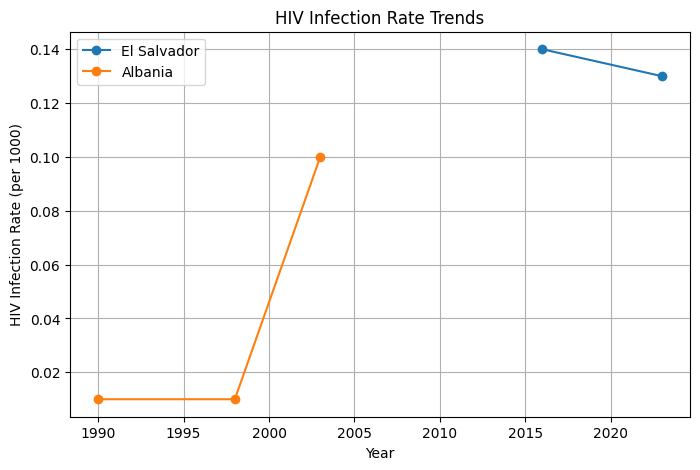

In [9]:
plt.figure(figsize=(8, 5))  # Set figure size

# Loop through unique country names
for country in df["GEO_NAME_SHORT"].unique():
    subset = df[df["GEO_NAME_SHORT"] == country]  # Filter data for each country
    plt.plot(subset["DIM_TIME"], subset["RATE_PER_1000_N"], marker="o", label=country)  # Plot line

# Labels and title
plt.xlabel("Year")
plt.ylabel("HIV Infection Rate (per 1000)")
plt.title("HIV Infection Rate Trends")
plt.legend()  # Show legend
plt.grid(True)  # Enable grid
plt.show()  # Display the plot


### The chart is a line graph that shows the trends of HIV infection rates over time for two countries: El Salvador and Albania.

#### Here's a breakdown of the key elements and what they represent:

#### X-axis: Represents the Year (DIM_TIME). It shows the years for which data is available for each country.

#### Y-axis: Represents the HIV Infection Rate (RATE_PER_1000_N). It shows the number of HIV infections per 1000 people in the respective countries for each year.
### In summary, the chart provides a visual representation of how HIV infection rates have changed over time in El Salvador and Albania. By observing the lines and their slopes, we can get insights into the patterns and trends of the epidemic in these two countries. It helps to see if the rates are increasing, decreasing, or remaining relatively stable over the years.

